In [1]:
import pandas as pd

In [ ]:
combined_model_smape_path = r"C:\Users\Shane\Desktop\2024.06.27_-_Data_Science\2024.10.13 - Portfolio Projects\2024.12.04 - Swing Ticker\SMAPE Model Eval\all_models_smape.csv"

In [3]:
df = pd.read_csv(combined_model_smape_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          150 non-null    object 
 1   volatility      150 non-null    object 
 2   avg_price       150 non-null    float64
 3   len             150 non-null    int64  
 4   smape_standard  150 non-null    float64
 5   smape_tuned     150 non-null    float64
 6   winsorized_pct  150 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB


In [5]:
df.head()

,ticker,volatility,avg_price,len,smape_standard,smape_tuned,winsorized_pct
0,WPP,Medium,32.136355,9355,0.270578,0.075833,0.364725
1,CVGW,Medium,31.071787,5681,0.162737,0.163886,0.363316
2,DFH,Medium,22.145518,1023,0.305700,0.239105,0.418377
3,RCEL,Medium-High,13.289237,3209,0.915579,0.627327,0.267061
4,C,Medium-Low,79.326248,12132,0.325752,0.241818,0.368035


In [6]:
len(df)

150

In [7]:
df.head()

,ticker,volatility,avg_price,len,smape_standard,smape_tuned,winsorized_pct
0,WPP,Medium,32.136355,9355,0.270578,0.075833,0.364725
1,CVGW,Medium,31.071787,5681,0.162737,0.163886,0.363316
2,DFH,Medium,22.145518,1023,0.305700,0.239105,0.418377
3,RCEL,Medium-High,13.289237,3209,0.915579,0.627327,0.267061
4,C,Medium-Low,79.326248,12132,0.325752,0.241818,0.368035


In [8]:
df['cust_delta'] = (df['smape_tuned'] - df['smape_standard']) / df['smape_standard']

In [9]:
df.head()

,ticker,volatility,avg_price,len,smape_standard,smape_tuned,winsorized_pct,cust_delta
0,WPP,Medium,32.136355,9355,0.270578,0.075833,0.364725,-0.719739
1,CVGW,Medium,31.071787,5681,0.162737,0.163886,0.363316,0.007056
2,DFH,Medium,22.145518,1023,0.305700,0.239105,0.418377,-0.217846
3,RCEL,Medium-High,13.289237,3209,0.915579,0.627327,0.267061,-0.314830
4,C,Medium-Low,79.326248,12132,0.325752,0.241818,0.368035,-0.257661


In [10]:
len(df)

150

In [11]:
vol_order = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']

In [12]:
# Set volatility to ordered categorical

df['volatility'] = pd.Categorical(df['volatility'], categories=vol_order, ordered=True) 

In [13]:
# Get average price, length, and winsorized percentage for each volatility level

df_mean = df.groupby('volatility').agg({
    'avg_price': 'mean', 
    'len': 'mean', 
    'winsorized_pct': 'mean',
    'cust_delta': 'mean', 
    'smape_standard': 'mean',
    'smape_tuned': 'mean'
}).sort_index().reset_index()
df_mean

C:\Users\Shane\AppData\Local\Temp\ipykernel_18992\3457669039.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean = df.groupby('volatility').agg({


,volatility,avg_price,len,winsorized_pct,cust_delta,smape_standard,smape_tuned
0,Low,36.112029,2896.100000,0.583867,-0.205721,0.068413,0.046811
1,Medium-Low,49.660711,6749.266667,0.377670,-0.225780,0.206292,0.130326
2,Medium,35.216324,4806.933333,0.376058,-0.247087,0.368252,0.214527
3,Medium-High,43794.336031,3374.900000,0.296519,-0.209040,0.552055,0.430741
4,High,229253.679447,2850.266667,0.278237,-0.205417,1.320087,1.063812


In [14]:
# Which category had a wider range of pct_change values?

df.groupby('volatility').agg({'cust_delta': 'std'}).sort_values('cust_delta', ascending=False).sort_index().reset_index()

C:\Users\Shane\AppData\Local\Temp\ipykernel_18992\1532854326.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('volatility').agg({'cust_delta': 'std'}).sort_values('cust_delta', ascending=False).sort_index().reset_index()


,volatility,cust_delta
0,Low,0.241052
1,Medium-Low,0.209395
2,Medium,0.283037
3,Medium-High,0.260027
4,High,0.217831


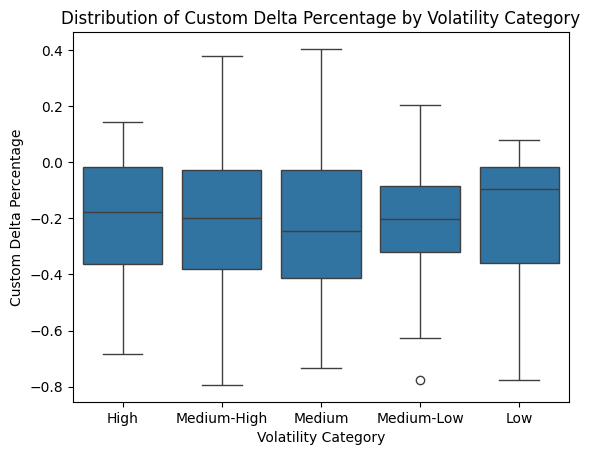

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order of volatility categories
volatility_order = ['High', 'Medium-High', 'Medium', 'Medium-Low', 'Low']

# Create the boxplot, specifying the order
sns.boxplot(x='volatility', y='cust_delta', data=df, order=volatility_order)
plt.title('Distribution of Custom Delta Percentage by Volatility Category')
plt.xlabel('Volatility Category')
plt.ylabel('Custom Delta Percentage')
plt.show()

In [16]:
# pct change between models across all samples was...

df['cust_delta'].mean()

np.float64(-0.21860883093341352)

In [17]:
df.sort_values(by='cust_delta').head()

,ticker,volatility,avg_price,len,smape_standard,smape_tuned,winsorized_pct,cust_delta
50,INMD,Medium-High,30.003641,1389,0.793135,0.163510,0.327574,-0.793843
143,JHMM,Low,39.257054,2360,0.257870,0.057397,0.550847,-0.777418
22,VNT,Medium-Low,30.851675,1104,0.254943,0.056781,0.398551,-0.777281
66,BURL,Medium,149.622933,2861,1.218546,0.325509,0.399511,-0.732871
0,WPP,Medium,32.136355,9355,0.270578,0.075833,0.364725,-0.719739


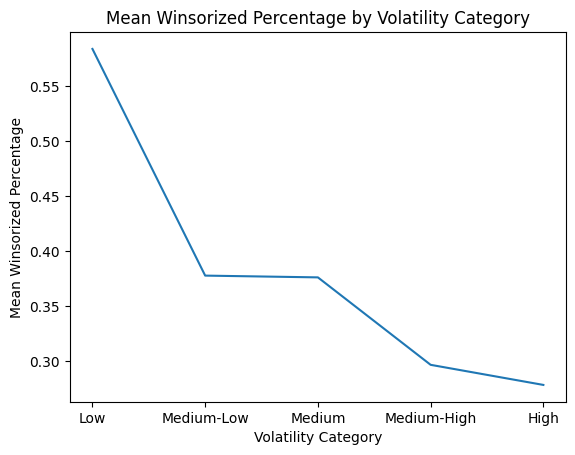

In [18]:
# line graph for volatility w winosrized_pct for df_mean

plt.plot(df_mean['volatility'], df_mean['winsorized_pct'])
plt.title('Mean Winsorized Percentage by Volatility Category')
plt.xlabel('Volatility Category')
plt.ylabel('Mean Winsorized Percentage')
plt.show()

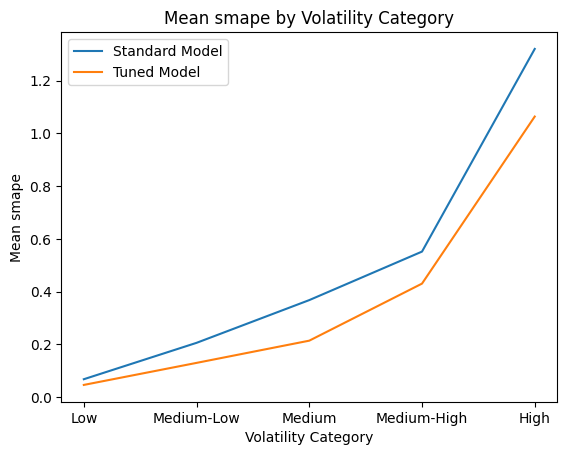

In [19]:
# line graph for volatility w smape_standard & smape_tuned

plt.plot(df_mean['volatility'], df_mean['smape_standard'], label='Standard Model')
plt.plot(df_mean['volatility'], df_mean['smape_tuned'], label='Tuned Model')
plt.title('Mean smape by Volatility Category')
plt.xlabel('Volatility Category')
plt.ylabel('Mean smape')
plt.legend()
plt.show()